# SAM(SegmentAnything Model) 세그멘테이션 특화 모델

segment_anything 라이브러리 install

In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-afs2g1vc
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-afs2g1vc
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=e5c30777684866d6c26daf597ebbab1832ca3c6de6fc18b50ce43fbfcc827b21
  Stored in directory: /tmp/pip-ephem-wheel-cache-tyfdmm79/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


모델 셋업

In [2]:
import os
import urllib
import torch
from segment_anything import SamPredictor, sam_model_registry

CHECKPOINT_PATH = os.path.join("checkpoint")
CHECKPOINT_NAME = "sam_vit_h_4b8939.pth"
CHECKPOINT_URL = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if not os.path.exists(CHECKPOINT_PATH):
    os.makedirs(CHECKPOINT_PATH, exist_ok=True)
checkpoint = os.path.join(CHECKPOINT_PATH, CHECKPOINT_NAME)
if not os.path.exists(checkpoint):
    urllib.request.urlretrieve(CHECKPOINT_URL, checkpoint)

sam = sam_model_registry["vit_h"](checkpoint=checkpoint).to(DEVICE)
predictor = SamPredictor(sam)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


이미지 로드

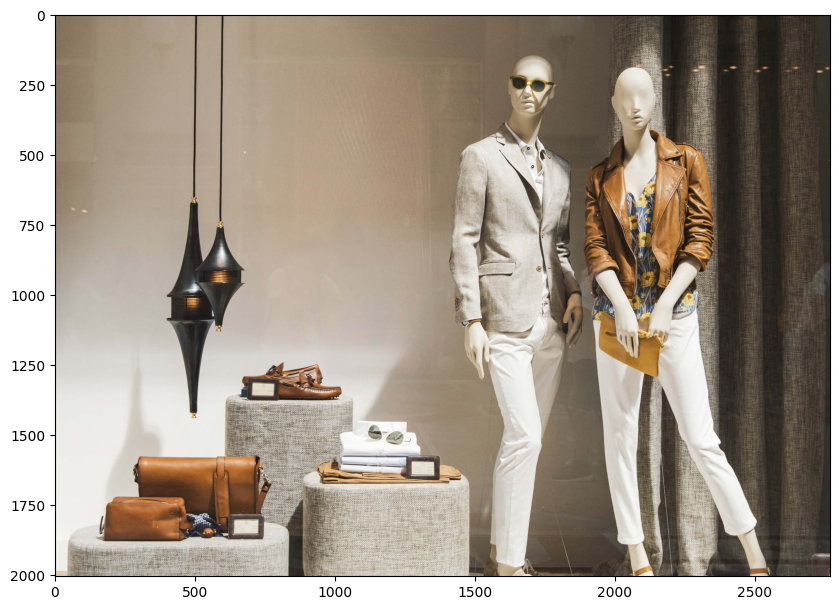

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "/content/mannequin.jpg"
image = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

좌표 셋업

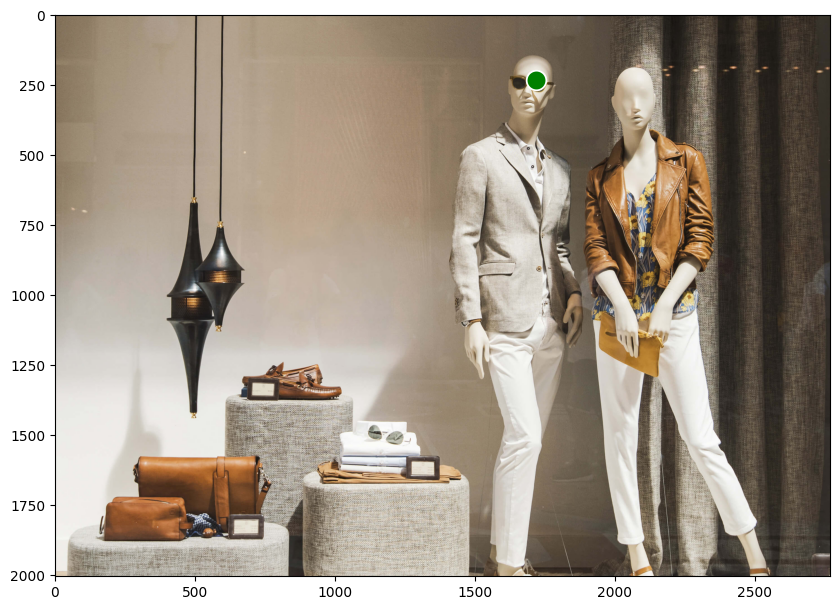

In [4]:
import numpy as np

point_coords = np.array([[1720, 230]])
points_labels = np.array([1])

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.gca().scatter(
    point_coords[0, 0],
    point_coords[0, 1],
    color="green",
    marker="o",
    s=200,
    edgecolor="white",
    linewidth=1.25,
)
plt.axis("on")
plt.show()

추론 코드

Mask 0


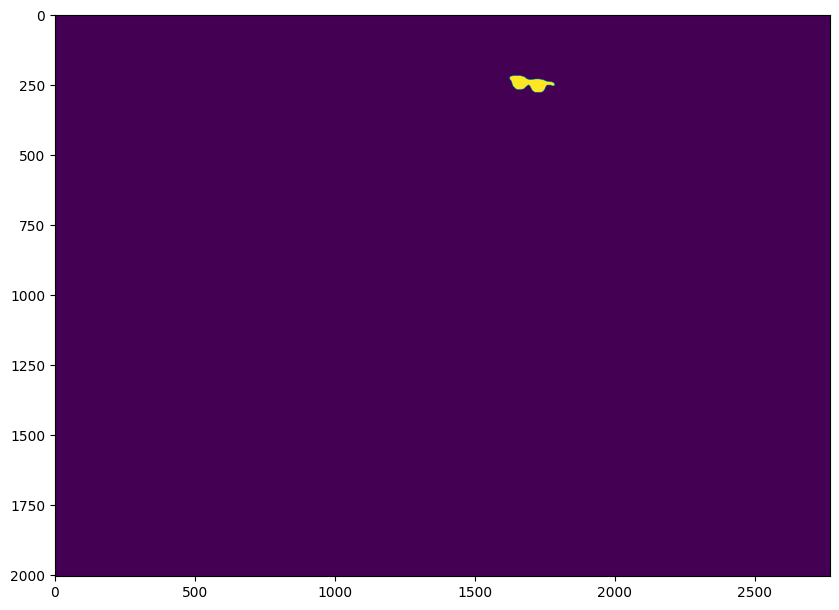

Mask 1


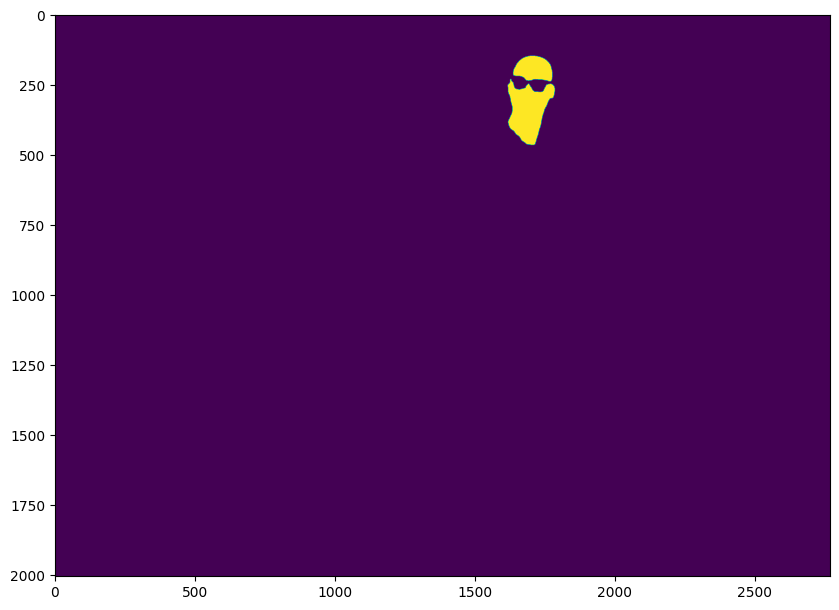

Mask 2


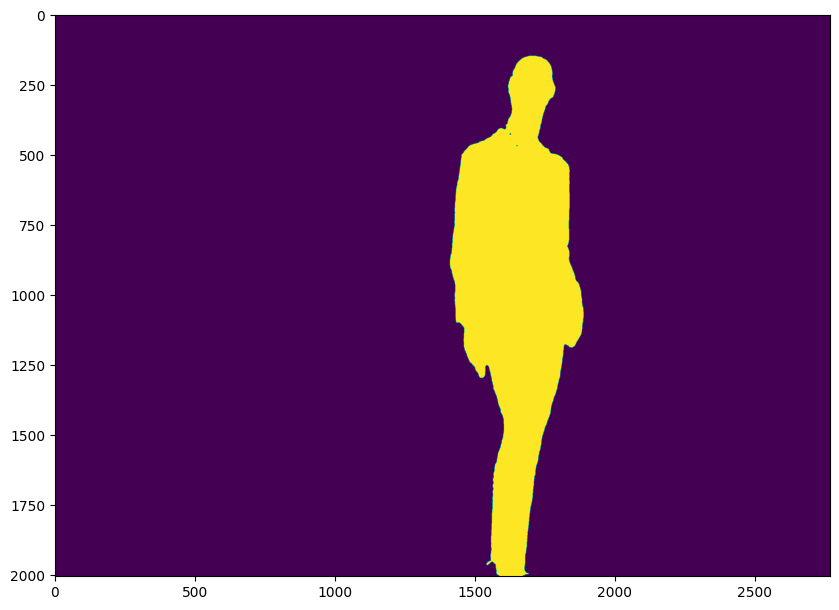

In [5]:
predictor.set_image(image)
masks, scores, _ = predictor.predict(point_coords, points_labels)

for i, mask in enumerate(masks):
    print(f"Mask {i}")
    plt.figure(figsize=(10, 10))
    plt.imshow(mask)
    plt.axis("on")
    plt.show()

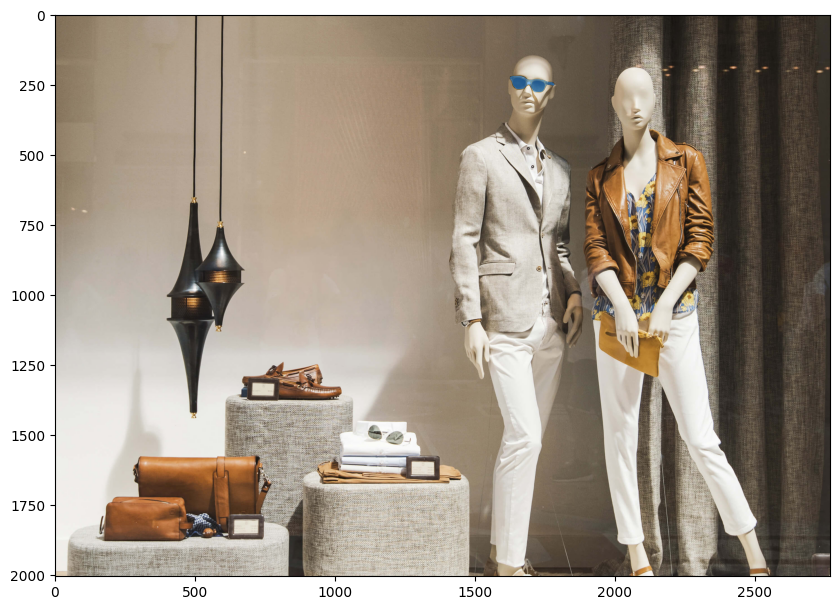

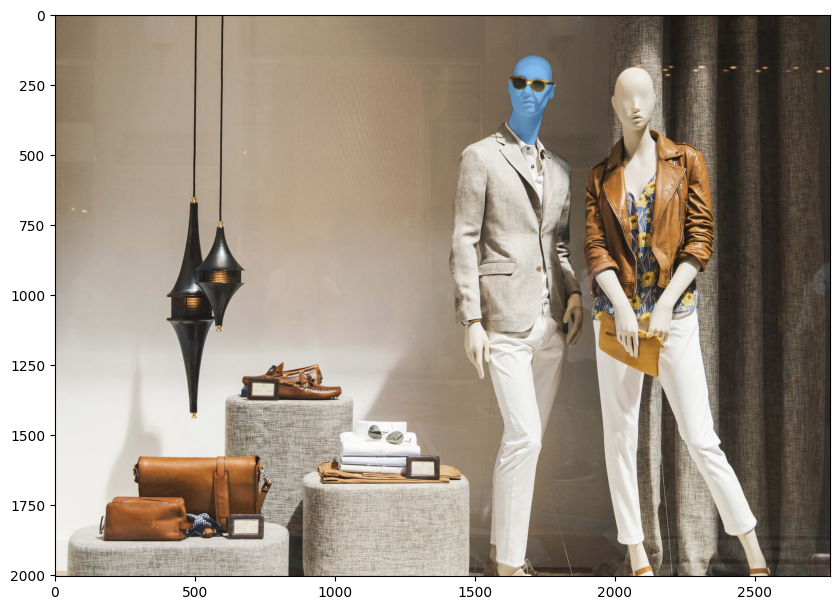

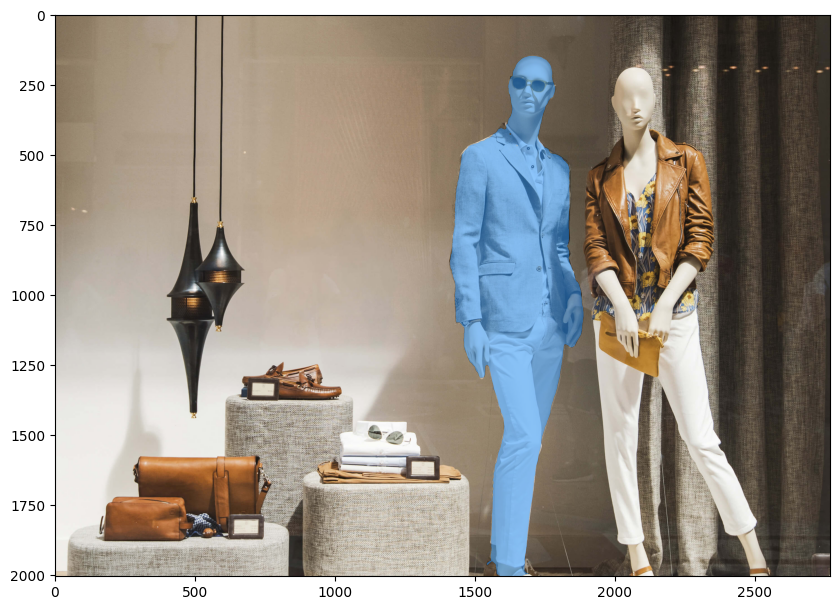

In [6]:
color = np.array([30/255, 144/255, 255/255, 0.5])

for mask in masks:
    mask_image = np.expand_dims(mask, axis=-1) * color.reshape(1, 1, -1)
    mask_image = (mask_image * 255).astype(np.uint8)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.imshow(mask_image)
    plt.axis("on")
    plt.show()

예측 성능 점수

In [8]:
scores

array([0.92259413, 0.84865165, 0.9595084 ], dtype=float32)

# Gradio 사용 프로젝트 만들기

In [ ]:
!pip install gradio==3.40.0

Gradio UI

In [11]:
import gradio as gr

with gr.Blocks() as app:
    gr.Markdown("# Interactive Remove Background from Image")
    with gr.Row():
        coord_x = gr.Number(label="Mouse coords x")
        coord_y = gr.Number(label="Mouse coords y")

    with gr.Row():
        input_img = gr.Image(label="Input image", height=600)
        output_img = gr.Image(label="Output image", height=600)

app.launch(inline=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.40.0, however version 5.0.1 is available, please upgrade.
--------
Running on public URL: https://2e6a541b3221f900de.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [12]:
app.close()

Closing server running on port: 7860


마우스 우클릭 이벤트 구현

In [13]:
def get_coords(evt: gr.SelectData):
    return evt.index[0], evt.index[1]


with gr.Blocks() as app:
    gr.Markdown("# Interactive Remove Background from Image")
    with gr.Row():
        coord_x = gr.Number(label="Mouse coords x")
        coord_y = gr.Number(label="Mouse coords y")

    with gr.Row():
        input_img = gr.Image(label="Input image", height=600)
        output_img = gr.Image(label="Output image", height=600)

    input_img.select(get_coords, None, [coord_x, coord_y])

app.launch(inline=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.40.0, however version 5.0.1 is available, please upgrade.
--------
Running on public URL: https://230b1c190d2089c121.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [14]:
app.close()

Closing server running on port: 7860


SAM -> 클래스화

In [15]:
from typing import Tuple

class SAMInferencer:
    def __init__(
        self,
        checkpoint_path: str,
        checkpoint_name: str,
        checkpoint_url: str,
        model_type: str,
        device: torch.device,
    ):
        print("[INFO] Initailize inferencer")
        if not os.path.exists(checkpoint_path):
            os.makedirs(checkpoint_path, exist_ok=True)
        checkpoint = os.path.join(checkpoint_path, checkpoint_name)
        if not os.path.exists(checkpoint):
            urllib.request.urlretrieve(checkpoint_url, checkpoint)
        sam = sam_model_registry[model_type](checkpoint=checkpoint).to(device)
        self.predictor = SamPredictor(sam)

    def inference(
        self,
        image: np.ndarray,
        point_coords: np.ndarray,
        points_labels: np.ndarray,
    ) -> np.ndarray:
        self.predictor.set_image(image)
        masks, scores, _ = self.predictor.predict(point_coords, points_labels)
        mask, _ = self.select_mask(masks, scores)
        return mask

    def select_mask(
        self, masks: np.ndarray, scores: np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray]:
        # Determine if we should return the multiclick mask or not from the number of points.
        # The reweighting is used to avoid control flow.
        # Reference: https://github.com/facebookresearch/segment-anything/blob/6fdee8f2727f4506cfbbe553e23b895e27956588/segment_anything/utils/onnx.py#L92-L105
        score_reweight = np.array([-1000] + [0] * 2)
        score = scores + score_reweight
        best_idx = np.argmax(score)
        selected_mask = np.expand_dims(masks[best_idx, :, :], axis=-1)
        selected_score = np.expand_dims(scores[best_idx], axis=0)
        return selected_mask, selected_score

In [16]:
CHECKPOINT_PATH = os.path.join("checkpoint")
CHECKPOINT_NAME = "sam_vit_h_4b8939.pth"
CHECKPOINT_URL = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

inferencer = SAMInferencer(
    CHECKPOINT_PATH, CHECKPOINT_NAME, CHECKPOINT_URL, "vit_h", DEVICE
)

[INFO] Initailize inferencer


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


추론 & 배경 제거 기능 구현

In [17]:
def extract_object(image: np.ndarray, point_x: int, point_y: int):
    point_coords = np.array([[point_x, point_y]])
    point_label = np.array([1])

    # Get mask
    mask = inferencer.inference(image, point_coords, point_label)

    # Extract object and remove background
    # Postprocess mask
    mask = (mask > 0).astype(np.uint8)

    # Remove background
    result_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert to rgba channel
    bgr_channel = result_image[..., :3]  # BGR 채널 분리
    alpha_channel = np.where(bgr_channel[..., 0] == 0, 0, 255).astype(np.uint8)
    result_image = np.dstack((bgr_channel, alpha_channel))  # BGRA 이미지 생성

    return result_image


def extract_object_by_event(image: np.ndarray, evt: gr.SelectData):
    click_x, click_y = evt.index

    return extract_object(image, click_x, click_y)


def get_coords(evt: gr.SelectData):
    return evt.index[0], evt.index[1]

Gradio에 기능 묶기

In [18]:
with gr.Blocks() as app:
    gr.Markdown("# Interactive Remove Background from Image")
    with gr.Row():
        coord_x = gr.Number(label="Mouse coords x")
        coord_y = gr.Number(label="Mouse coords y")

    with gr.Row():
        input_img = gr.Image(label="Input image", height=600)
        output_img = gr.Image(label="Output image", height=600)

    input_img.select(extract_object_by_event, [input_img], [output_img])
    input_img.select(get_coords, None, [coord_x, coord_y])

app.launch(inline=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.40.0, however version 5.0.1 is available, please upgrade.
--------
Running on public URL: https://abe5820f15839d69d8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
app.close()